<a href="https://colab.research.google.com/github/Marieke-do/Final-assignment---CO2-emissions/blob/main/Final_assignment_CO2_emissions_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final assignment - CO2 emissions - part 3**


---


1. What is the biggest predictor of a large CO2 output per capita of a country? (Notebook: Final assignment - CO2 emissions_part1)
2. Which countries are making the biggest strides in decreasing CO2 output?
**3. Which non-fossil fuel energy technology will have the best price in the future? (Notebook: Final assignment - CO2 emissions_part3)**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/levelized-cost-of-energy.csv')
df.columns
df.drop(columns = ['Code'], inplace = True)

# rename columns
new_cols = ['Entity','Year', 'CSP','Hydro', 'Solar','Onshore wind', 'Bioenergy','Geothermal', 'Offshore wind']
df.columns = new_cols

df= df.loc[df["Entity"]== 'World']
df = df.sort_values('Year')
df


,Entity,Year,CSP,Hydro,Solar,Onshore wind,Bioenergy,Geothermal,Offshore wind
386,World,1983,NaN,NaN,NaN,0.308,NaN,NaN,NaN
387,World,1984,NaN,NaN,NaN,0.294,NaN,NaN,NaN
388,World,1985,NaN,NaN,NaN,0.276,NaN,NaN,NaN
389,World,1986,NaN,NaN,NaN,0.247,NaN,NaN,NaN
390,World,1987,NaN,NaN,NaN,0.240,NaN,NaN,NaN
391,World,1988,NaN,NaN,NaN,0.201,NaN,NaN,NaN
392,World,1989,NaN,NaN,NaN,0.187,NaN,NaN,NaN
393,World,1990,NaN,NaN,NaN,0.204,NaN,NaN,NaN
394,World,1991,NaN,NaN,NaN,0.196,NaN,NaN,NaN
395,World,1992,NaN,NaN,NaN,0.193,NaN,NaN,NaN


Levelized cost of energy (LCOE) estimates the average cost per unit of energy generated across the lifetime of a new power plant. It is measured in 2019 US$ per kilowatt-hour.

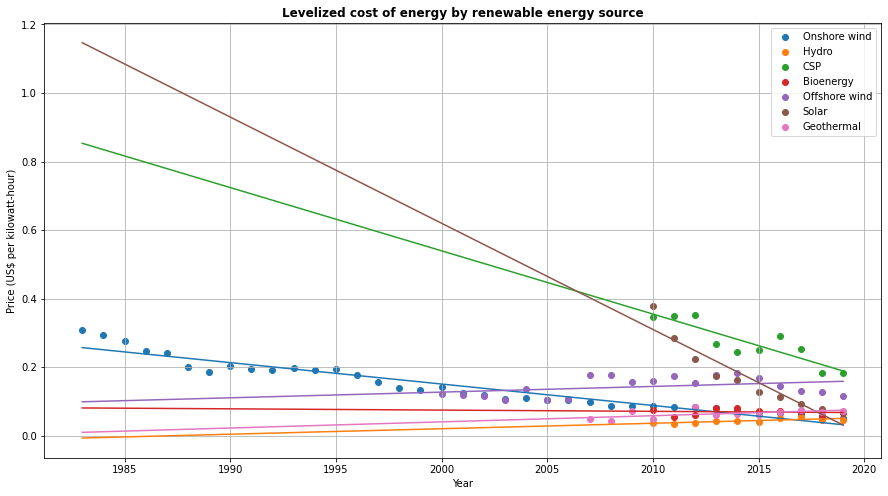

In [ ]:
from scipy import stats
  
def plot(energy_source):
  # fig = plt.figure(figsize = (12,8))
  x = df['Year']
  y = df[energy_source]
  mask = ~np.isnan(x) & ~np.isnan(y)
  slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

  def myfunc(x):
    return slope * x + intercept

  mymodel = list(map(myfunc, x))

  plt.scatter(x, y, label = energy_source)
  plt.plot(x, mymodel)
  plt.xlabel('Year')
  plt.ylabel('Price (US$ per kilowatt-hour)')
  plt.legend()
  plt.grid()
  plt.title('Levelized cost of energy by renewable energy source', fontweight = 'bold')
  
  plt.rcParams['figure.figsize'] = [15, 8]
  # price_2025 = myfunc(2025)
  # print(price_2025)
  
plot('Onshore wind')
plot('Hydro')
plot('CSP')
plot('Bioenergy')
plot('Offshore wind')
plot('Solar')
plot("Geothermal")


The 'levelized cost of energy by renewable energy source' graph shows the linear regression lines of all non fossil energy sources. 
Energy produced by solar panels (solar) has been decreasing fastest over the years, so it is most likely that the price for solar energy will be lowest in the future. 